# Análise Estatística de Dados com Numpy para a área de Marketing

## 1. Definição do Problema de Negócio

### 1.1. Contexto

Uma plataforma de e-commerce coleta um volume significativo de dados sobre a interação dos usuários com o site, incluindo o número de visitas, a duração da sessão, a atividade de adição de produtos ao carrinho e os valores de compra finalizados. No entanto, esses dados estão sendo subutilizados. Atualmente, as decisões sobre campanhas de marketing, promoções e melhorias na experiência do usuário (UX) são tomadas com base em intuição e métricas de alto nivel, sem uma compreensão aprofundada dos padrões de comportamento que impulsionam os resultados.

### 1.2. Problema de Negócio

A empresa enfrenta o desafio de compreender profundamente os padrões de comportamento que diferenciam os clientes de alto valor dos visitantes que abandonam o site sem comprar. Essa falta de clareza resulta em:

    • Marketing Genérico: Nossas campanhas de marketing são de "tamanho único", resultando em baixo engajamento e desperdício de orçamento, pois não conseguimos personalizar as ofertas para os segmentos de clientes corretos.
    
    • Perda de Oportunidades: Não conseguimos identificar e engajar proativamente os clientes com maior potencial de compra ou criar estratégias para converter os visitantes que demonstram interesse, mas não finalizam a compra.
    
    • Decisões Não Embasadas: As estratégias de produto e de experiência do usuário carecem de uma base quantitativa sólida sobre quais comportamentos (ex: tempo no site, frequência de visitas) estão mais fortemente correlacionados com o sucesso das vendas.

### 1.3. Objetivo Principal

Utilizar a análise estatística dos dados de navegação e compra para segmentar clientes, identificar os principais indicadores de comportamento que levam à conversão e fornecer insights acionáveis para as equipes de marketing e produto, a fim de aumentar o ticket médio e a taxa de conversão geral da plataforma.

### 1.4. Perguntas-Chave a Serem Respondidas
A análise de dados deve responder às seguintes perguntas criticas de negócio:

    • 1- Qual é o perfil médio do nosso usuário em termos de visitas, tempo de navegação e valor de compra (ticket médio)?
    
    • 2- Quais são as características e comportamentos distintos dos nossos clientes de "Alto Valor"? Eles visitam mais o site? Passam mais tempo navegando?
    
    • 3- Qual é o comportamento dos usuários que visitam o site, mas não realizam nenhuma compra? Onde está a oportunidade de conversão com este grupo?
    
    • 4-Existe uma correlação estatisticamente relevante entre o tempo gasto no site, o número de itens no carrinho e o valor final da compra?

### 1.5. Resultado Esperado e Impacto no Negócio

O resultado deste projeto será um relatório de análise estatística que permitirá:

    • Segmentação Aprimorada: Criação de pelo menos dois segmentos de clientes (ex: "Clientes de Alto Valor" e "Visitantes Engajados sem Compra") para direcionamento de campanhas de marketing personalizadas.
    
    • Otimização de Marketing: Direcionar o orçamento de marketing para ações focadas nos comportamentos que mais se correlacionam com compras de alto valor, aumentando o Retorno Sobre o Investimento (ROI).
    
    • Melhoria da Experiência do Usuário (UX): Fornecer à equipe de produto dados que possam justificar testes A/B ou melhorias em áreas do site frequentadas por usuários que não convertem.

## 2. Importação das bibliotecas

In [2]:
# Instalando o NumPy
!pip install -q numpy

In [3]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)

## 3. Geração de Dados Fictícios

Será criado um conjunto de dados para 500 usuários. Cada usuário terá 4 metras associadas:

    * visitas: número de vezes que o usuário visitou o site no mês;
    
    * tempo_no_site: tempo total em minutos que o usuário passou no site;
    
    * itens_no_carrinho: número de itens que o usuário adicionou ao carrinho;
    
    * valor_compra: o valor total em R$ da compra realizada pelo usuário no mês.

In [5]:
# Definindo o número de usuários
num_usuarios = 500

In [6]:
# Gerar o número de visitas 
visitas = np.random.randint(1, 51, size = num_usuarios)

In [7]:
# Gerar o tempo no site (distribuição normal, correlacionado com as visitas)

 # Média de 20 min, desvio padrão de 5, com um bônus por visita

tempo_no_site = np.random.normal(loc = 20, scale = 5, size = num_usuarios) + (visitas * 0.5)
tempo_no_site = np.round(tempo_no_site, 2) #arredondar para 2 casas decimais

São gerados números aleatórios seguindo uma distribuição normal, de acordo com parâmetros estabelecidos, loc (média - a maioria dos valores fica perto de 20), scale (desvio padrão) e size, resultando em um array de tamanho num_usuarios.

O tempo no site é ajustado com base no número de visitas. Cada visita adiciona 0,5 unidades de tempo.

Resumindo: cada usuário tem um tempo base aleatório e esse tempo aumenta conforme o número de viisitas.
O tempo do site varia naturalmente entre os usuários, mas quanto mais visitas, maior tende a ser o tempo atual.

In [8]:
# Gerar o número de itens no carrinho (dependente das visitas e do tempo)

itens_no_carrinho = np.random.randint(0,8, size = num_usuarios) + (visitas // 10)

São gerados números inteiros aleatórios entre 0 e 7 para cada usuário.
Em seguida, é somado um valor baseado no número de visitas, onde a cada 10 visitas completas adiciona-se 1 item ao carrinho.

Assim, o número de itens no carrinho varia entre usuários, mas tende a aumentar conforme o número de visitas.

Usuários com mais visitas tendem a adicionar mais itens ao carrinho, mas em “degraus”.

In [9]:
# Garantir que o tempo no site também influêncie positivamente

itens_no_carrinho = (itens_no_carrinho + (tempo_no_site // 15)).astype(int)

O número de itens no carrinho é atualizado somando-se um valor baseado no tempo no site, onde a cada 15 unidades completas de tempo adiciona-se 1 item. Em seguida, os valores são convertidos para inteiro, garantindo consistência no tipo de dado.

In [10]:
# Gerar o valor de compra (correlacionado com os itens no carrinho)

    # preço médio por item de R$ 35, com alguma variação aleatória

valor_compra = (itens_no_carrinho * 35) + np.random.normal(loc = 0, scale = 10, size = num_usuarios)

O valor da compra é calculado multiplicando o número de itens no carrinho por 35, gerando um valor base. Em seguida, é adicionada uma variação aleatória com média zero e desvio padrão 10, simulando flutuações naturais no valor final da compra.

In [11]:
# Se não houver itens no carrinho, o valor da compra deve ser 0

valor_compra[itens_no_carrinho == 0] = 0

# Corrigir valores negativos que possam surgir

valor_compra[valor_compra < 0] = 0

valor_compra = np.round(valor_compra, 2)

In [12]:
# Unir tudo em uma única matriz. Cada linha representa um usuário, cada coluna representa uma métrica

dados_ecommerce = np.column_stack((visitas, tempo_no_site, itens_no_carrinho, valor_compra))

In [13]:
print("\nShape da massa de dados:", dados_ecommerce.shape)
print("\nExemplo dos 5 primeiros usuários (linhas):")
print("\nColunas: [Visitas, Tempo no Site (min), Itens no Carrinho, Valor da Compra (R$)]\n")
print(dados_ecommerce[:5])


Shape da massa de dados: (500, 4)

Exemplo dos 5 primeiros usuários (linhas):

Colunas: [Visitas, Tempo no Site (min), Itens no Carrinho, Valor da Compra (R$)]

[[ 39.    23.29   9.   314.54]
 [ 29.    29.38   5.   177.43]
 [ 15.    26.24   6.   207.59]
 [ 43.    35.26   8.   283.52]
 [  8.    32.16   3.    92.48]]


## 4. Análise Estatística Descritiva

### Pergunta 1

Qual é o perfil médio do nosso usuário em termo de visitas, tempo de navegação e valor de compra (ticket médio)?

In [14]:
# Separando colunas para facilitar a leitura do código

visitas_col = dados_ecommerce[:, 0]
tempo_col = dados_ecommerce[:, 1]
itens_col = dados_ecommerce[:, 2]
valor_col = dados_ecommerce[:, 3]

In [15]:
# Calculando a média das colunas

media_visitas = np.mean(visitas_col)
media_tempo = np.mean(tempo_col)
media_itens = np.mean(itens_col)
media_valor = np.mean(valor_col)

print(f"\nMédia de Visitas: {media_visitas:.2f}")
print(f"\nMédia de Tempo no Site: {media_tempo:.2f} min")
print(f"\nMédia de Itens no carrinho: {media_itens:.2f}")
print(f"\nMédia de Valor de Compra (Ticket Médio): R$ {media_valor:.2f}")


Média de Visitas: 25.86

Média de Tempo no Site: 32.78 min

Média de Itens no carrinho: 7.20

Média de Valor de Compra (Ticket Médio): R$ 252.70


In [16]:
# Calculando a mediana do Valor de Comnpras
mediana_valor = np.median(valor_col)
print(f"\nMediana de Valor de Compra: R$ {mediana_valor:.2f}")


Mediana de Valor de Compra: R$ 248.13


In [17]:
# Calcilando desvio padrão do Valor de Compra
std_valor = np.std(valor_col)
print(f"\nDesvio Padrão de Valor de Compra: R$ {std_valor:.2f}")


Desvio Padrão de Valor de Compra: R$ 106.94


In [18]:
# Retornando valores máximos e mínimos
max_valor = np.max(valor_col)
min_valor_positivo = np.min(valor_col[valor_col > 0])

print(f"\nMaior valor de compra): R$ {max_valor:.2f}")
print(f"\nMenor valor de compra (de quem comprou): R$ {min_valor_positivo:.2f}")


Maior valor de compra): R$ 530.37

Menor valor de compra (de quem comprou): R$ 23.42


In [23]:
# Medidas a serem utilizadas no gráfico
visitas_col = dados_ecommerce[:, 0]
tempo_col = dados_ecommerce[:, 1]
itens_col = dados_ecommerce[:, 2]
valor_col = dados_ecommerce[:, 3]

media_valor = np.mean(valor_col)
mediana_valor = np.median(valor_col)
std_valor = np.std(valor_col)

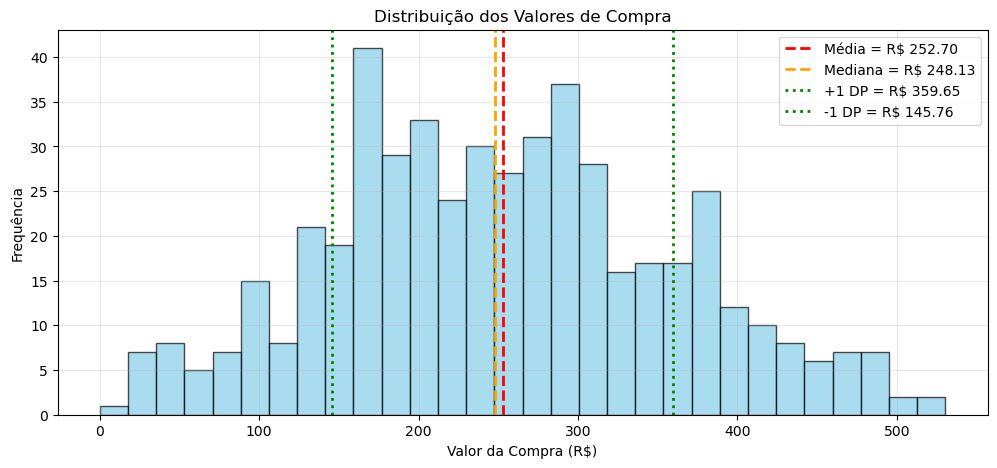

In [24]:
# Gráfico

plt.figure(figsize = (12, 5))
plt.hist(valor_col, bins = 30, color = 'skyblue', edgecolor = 'black', alpha = 0.7)
plt.axvline(media_valor, color = 'red', linestyle = '--', linewidth = 2, label = f'Média = R$ {media_valor:.2f}')
plt.axvline(mediana_valor, color = 'orange', linestyle = '--', linewidth = 2, label = f'Mediana = R$ {mediana_valor:.2f}')
plt.axvline(media_valor + std_valor, color = 'green', linestyle = ':', linewidth = 2, label = f'+1 DP = R$ {media_valor + std_valor:.2f}')
plt.axvline(media_valor - std_valor, color = 'green', linestyle = ':', linewidth = 2, label = f'-1 DP = R$ {media_valor - std_valor:.2f}')
plt.title('Distribuição dos Valores de Compra')
plt.xlabel('Valor da Compra (R$)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

### Reposta da Pergunta 1:

Pode se inferir da análise que o usuário visita o site, em média, 26 vezes por mês, passa um tempo médio de 33 minutos no site, adiciona aproximadamente 7 itens ao carrinho e e realiza compras com ticlet médio de R$ 248,00. 

Há uma grande variação entre clientes, alguns compram valores baixos a partir de R$$23,42.
Outros chegam a gastar até R$ 530,37.

#### Anotações:

**plt.figure(figsize=())** -> cria uma nova area de gráfico. O primeiro parâmetro é a largura e o segundo a altura.
                              Serve para deixar o gráfico mais largo e legível.


**plt.hist(...)** -> cria um histograma que mostra a distribuição dos dados:

                      * valor_col - dados analisados
                      * bins=x - divide os dados em x intervalos
                      * color=' ' - cor das barras
                      * edgecolor=' ' - contorno das barras
                      * alpha=x - transparência de x%

**plt.axvline(...)** -> adiciona uma linha vertical representando uma medida

                      * media_valor - posição da linha no eixo X
                      * color=' ' - cor da linha
                      * linestyle='--' - linha tracejada
                      * linewidth=x - expessura
                      * label=' ' - texto exibido na legenda
                      * :.2f - formata o valor com duas casas decimais.

**plt.title(...)** -> define o título principal do gráfico

**plt.xlabel(...)** -> nomeia o eixo horizontal

**plt.ylabel(...)** -> nomeia o eixo vertical

**plt.legend( )** -> mostra a legenda com as linhas adicionadas

**plt.grid(...)** -> adiciona uma grade leve ao gráfico:

                      * alpha=x - grade discreta

**plt.show()** -> renderiza e exibe o gráfico na tela
                      

## Segmentação e Análise de Clientes

### Pergunta 2

Quais são as características e comportamentos distintos dos nossos clientes de "Alto Valor"? Eles visitam mais o site? Passam mais tempo navegando?

In [27]:
# Flitro booleano para clientes com compras > R$ 250

clientes_alto_valor = dados_ecommerce[dados_ecommerce[:,3] > 250]

print(f"O número de clientes de alto valor é: {clientes_alto_valor.shape[0]}")

O número de clientes de alto valor é: 245


In [28]:
# Estatísticas deste segmento

media_visitas_alto_valor = np.mean(clientes_alto_valor[:,0])
media_tempo_alto_valor = np.mean(clientes_alto_valor[:,1])

print(f"A média de visitas desses clientes é: {media_visitas_alto_valor:.2f}")
print(f"A média de tempo no site desses clientes é: {media_tempo_alto_valor:.2f} min")

A média de visitas desses clientes é: 33.29
A média de tempo no site desses clientes é: 37.11 min


### Resposta da Pergunta 2:

Os clientes de alto valor, visitam o site com maior frequência, cerca de 33 vezes, em média, por mês. Permanecem mais tempo navegando, cerca de 37 minutos. Esse comportamente sugere alto nível de engajamento, quanto mais estes clientes interagem com a plataforma, maior tende a ser o valor de suas compras.

### Pergunta 3

Qual é o comportamento dos usuários que visitam o site, mas não realizam nenhuma compra? Onde está a oportunidade de conversão com este grupo?

In [29]:
# Filtro para visitantes que não compram
visitantes_sem_compra = dados_ecommerce[dados_ecommerce[:,3] == 0]

print(f"O número de visitantes que não compraram é: {visitantes_sem_compra.shape[0]}")

O número de visitantes que não compraram é: 1


In [31]:
# Estatísticas deste segmento

media_tempo_sem_compra = np.mean(visitantes_sem_compra[:,1])
media_visitas_sem_compra = np.mean(visitantes_sem_compra[:,0])

print(f"A média de visitas desses visitantes é: {media_visitas_sem_compra:.2f}")
print(f"Apesar de não comprarem, eles passam em média: {media_tempo_sem_compra:.2f} min no site.")

A média de visitas desses visitantes é: 7.00
Apesar de não comprarem, eles passam em média: 14.71 min no site.


Os usuários que visitam o site, mas não finalizam nenhuma compra, visitam o site em média 7 vezes no mês e permanecem cerca de 15 minutos navegando.
Aqui vemos a oportunidade de implementar ações de remarketing, incentivos como descontos ou frete grátis e otimização do proceso de check-out.

## Análise de Correlação

Valores próximos de 1 → forte correlação positiva

Valores próximos de -1 → forte correlação negativa

Valores próximos de 0 → pouca ou nenhuma correlação

### Pergunta 4

Existe uma correlação estatisticamente relevante entre o tempo gasto no site, o número de itens no carrinho e o valor final da compra?

In [36]:
# A função np.corrcoef calcula a matriz de correlação
# rowvar=False indica que as colunas são as variáveis

matriz_correlacao = np.corrcoef(dados_ecommerce, rowvar=False)

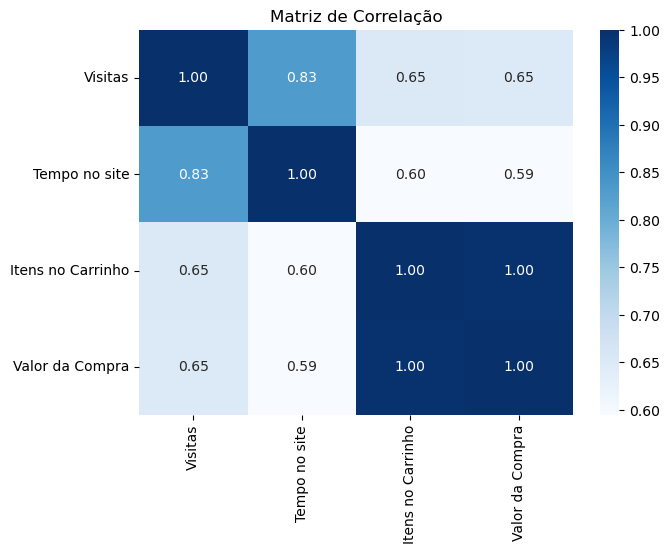

In [39]:
# Gráfico

# Definir nome das variáveis
nomes_variaveis = ["Visitas", "Tempo no site", "Itens no Carrinho", "Valor da Compra"]

# Converter em DataFrame para exibir com rótulos
df_correlacao = pd.DataFrame(matriz_correlacao,
                             index = nomes_variaveis,
                             columns = nomes_variaveis)

# Heatmap

plt.figure(figsize = (7, 5))
sns.heatmap(df_correlacao, annot = True, cmap = "Blues", fmt = ".2f")
plt.title("Matriz de Correlação")
plt.show()

#### Anotações:

**sns.heatmap(...)** -> gera um mapa de calor (heatmap):

                       * df_correlacao - dados que serão plotados
                       * annot=True - exibe os valores numéricos dentro das células
                       * cmap="..." - escala de cores
                       * fmt=".2f" - formata os valores com duas casas decimais

# Relatório Final, Conclusões e Insights a Partir dos Dados

A análise estatística dos dados de navegação e compras dos usuários do e-commerce permitiu compreender melhor o comportamento dos clientes e identificar padrões diretamente relacionados à geração de receita.

### 1. Perfil Geral dos Usuários

Os usuários acessam a plataforma em média 25,86 vezes por mês, navegam no site cerca de 32,78 minutos por sessão. Cada cliente adiciona, em média, 7,20 itens ao carrinho e realiza compras com ticket médio de R252, 70. A mediana do valor gasto é de R 248,13 - isto indica que metade dos clientes compra abaixo e metade acima desse valor. Observou-se uma dispersão considerável nos gastos (desvio padrão de R106, 94), com compras variando de R 23,42 (mínimo entre compradores) a R$ 530,37 (máximo registrado).

Esses números mostram que existe um grupo significativo de consumidores que gasta mais que a média, mas também há grande variação no comportamento de compra.

### 2. Clientes de Alto Valor

Ao analisar os clientes que gastam mais de R$ 250, identificou-se um total de 245 usuários, representando aproximadamente metade da base analisada. Este grupo visita o site mais vezes (33,29 visitas em média) e permanece por mais tempo (37,11 minutos), comparado ao perfil geral.

Isso sugere um engajamento elevado, tanto em frequência de visitas quanto em tempo de navegação, fortemente associado a compras de maior valor. Esses clientes podem ser considerados um segmento prioritário para ações de fidelização, programas de recompensa e campanhas personalizadas.

### 3. Visitantes Que Não Compram

Foi identificado apenas 1 usuário que navega no site sem realizar compras. Apesar de ser um caso isolado nesta base, ele visita em média 7 vezes e permanece 14,71 minutos no site. Esse comportamento ilustra a importância de monitorar usuários engajados que não convertem, pois podem representar oportunidades para campanhas de remarketing, melhorias no processo de checkout ou incentivos específicos para concluir a compra.


### 4. Relações Entre Comportamentos e Receita

A matriz de correlação revelou informações valiosas:

    • Itens no Carrinho → Valor da Compra = 1,00→ correlação positiva perfeita; cada item adicional impacta diretamente o valor gasto.
    
    • Tempo no Site → Itens no Carrinho = 0,60 → correlação moderada; usuários que permanecem mais tempo tendem a adicionar mais itens.
    
    • Tempo no Site → Valor da Compra = 0,59 → correlação moderada; quanto mais tempo no site, maior tende a ser a compra.
    
    • Visitas → Valor da Compra = 0,65 → correlação positiva; maior frequência de acessos também contribui para compras maiores.

Esses resultados confirmam que engajamento do usuário (tempo e visitas) influencia a construção do carrinho e, consequentemente, o valor final da compra.

### 5. Conclusões e Recomendações

    • Segmentação estratégica: os clientes de alto valor apresentam comportamento diferenciado, com maior frequência e tempo de navegação. Esse grupo deve ser alvo de campanhas personalizadas e programas de fidelidade para aumentar retenção e ticket médio.
    
    • Incentivo à construção de carrinho: como a quantidade de itens é fator determinante no valor gasto, estratégias como recomendações personalizadas, descontos ersonalizada progressivos e combos podem elevar o ticket médio.
    
    • Aproveitamento de visitantes engajados sem compra: embora pouco representativo aqui, vale investir em remarketing e otimização de UX para reduzir fricções no checkout e converter quem demonstra interesse.
    
    • Base quantitativa para decisões: a análise estatística mostra que dados simples (visitas, tempo, itens) já oferecem insights poderosos para melhorar campanhas de marketing e decisões de produto, substituindo ações baseadas apenas em intuição.